In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

## task 01

1. Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.
2. Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации и сравнить результаты.
3. Модернизировать решение задания 2, заменив L2 регуляризацию на L1 регуляризацию.

In [2]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [3]:
def gd_model(X, y, max_iter, eta = 0.01):
    eps = 1e-8
    n = y.shape[0]
    W = np.zeros(2)
    weight_dist = np.inf
    i = 0
    weights = [W.copy()]
    errors = []
    
    while weight_dist > eps and i < max_iter:
        y_pred = W.dot(X.T)
        err = calc_mse(y, y_pred)

        W_new = W - eta * 2 * X.T.dot(X.dot(W) - y) / n
        weight_dist = np.linalg.norm(W_new - W, ord = 2)
        i += 1
        weights.append(W_new)
        errors.append(err)
        W = W_new
    weights = np.array(weights)
    return W, errors, weights, err, i

In [4]:
def sgd_model(X, y, max_iter, eta = 0.01):
    eps = 1e-8
    n = y.shape[0]
    W = np.zeros(2)
    weight_dist = np.inf
    i = 0
    weights = [W.copy()]
    errors = []
    np.random.seed(1234) # начальные условия генератора случайных чисел
    
    while weight_dist > eps and i < max_iter:
        
        train_ind = np.random.randint(X.shape[0]) #случайный индекс объекта выборки
        
        y_pred = W.dot(X.T)
        err = calc_mse(y, y_pred)
        
        W_new = W - eta * 2 * X[train_ind].T.dot(X[train_ind].dot(W) - y[train_ind]) / n
        weight_dist = np.linalg.norm(W_new - W, ord = 2)
        i += 1
        weights.append(W_new)
        errors.append(err)
        W = W_new
    weights = np.array(weights)
    return W, errors, weights, err, i

In [5]:
#Lasso
def sgd_model_l1(X, y, max_iter, eta = 0.01, lambda_ = 1e-8):
    eps = 1e-8
    n = y.shape[0]
    W = np.zeros(2)
    weight_dist = np.inf
    i = 0
    weights = [W.copy()]
    errors = []
    np.random.seed(1234) # начальные условия генератора случайных чисел
    
    while weight_dist > eps and i < max_iter:
        
        train_ind = np.random.randint(X.shape[0]) #случайный индекс объекта выборки
        
        y_pred = W.dot(X.T)
        err = calc_mse(y, y_pred)
        
        W_new = W - eta * (2 * X[train_ind].T.dot(X[train_ind].dot(W) - y[train_ind]) / n + lambda_ * np.linalg.norm(W, ord = 1)) #сумма модулей W
        weight_dist = np.linalg.norm(W_new - W, ord = 2)
        i += 1
        weights.append(W_new)
        errors.append(err)
        W = W_new
    weights = np.array(weights)
    return W, errors, weights, err, i

In [6]:
#Ridge
def sgd_model_l2(X, y, max_iter, eta = 0.01, lambda_ = 1e-8):
    eps = 1e-8
    n = y.shape[0]
    W = np.zeros(2)
    weight_dist = np.inf
    i = 0
    weights = [W.copy()]
    errors = []
    np.random.seed(1234) # начальные условия генератора случайных чисел
    
    while weight_dist > eps and i < max_iter:
        
        train_ind = np.random.randint(X.shape[0]) #случайный индекс объекта выборки
        
        y_pred = W.dot(X.T)
        err = calc_mse(y, y_pred)
        
        W_new = W - eta * (2 * X[train_ind].T.dot(X[train_ind].dot(W) - y[train_ind]) / n + lambda_ * W.T.dot(W)) #сумма квадратов W
        weight_dist = np.linalg.norm(W_new - W, ord = 2)
        i += 1
        weights.append(W_new)
        errors.append(err)
        W = W_new
    weights = np.array(weights)
    return W, errors, weights, err, i

In [7]:
# генерация набора данных. X, y, истинные веса W
data, target, coef = datasets.make_regression(n_samples=1000, 
                                              n_features = 2, 
                                              n_informative = 2, 
                                              n_targets = 1, 
                                              noise = 5, 
                                              coef = True, 
                                              random_state = 2)

In [8]:
coef

array([62.6735955, 68.0472182])

In [9]:
#стандартизация
# data_st = (data - data.mean(axis = 0)) / data.std(axis = 0)
# data_st

In [10]:
#наборы параметров
etas = np.array([1e-2, 1e-4, 1e-6])
iters = np.array([1e4, 1e5, 2e5])
lambdas = np.array([1e-6, 1e-8, 1e-10])

In [11]:
#подбор параметров sgd_L2
a = []
for vals in itertools.product(iters, etas, lambdas):
    W, errors, weights, err, i = sgd_model_l2(data, target, *vals)
    a.append([*vals, W, i, err])

ind = [params[-1] for params in a].index(min([params[-1] for params in a]))
best_mse = a[ind][5]
best_eta = a[ind][1]
best_lambda = a[ind][2]
if a[ind][0] > a[ind][4]: #алгоритм сошелся раньше, чем достигли max_iter
    best_iter = a[ind][4]
else: #алгоритм так и не сошелся при данных eta, max_iters и lambda_
    best_iter = a[ind][0] 
    print('алгоритм не сошелся')

best_eta, best_lambda, best_iter, best_mse

алгоритм не сошелся


(0.01, 1e-08, 200000.0, 30.397063972152683)

In [12]:
#Все варианты буду запускать с параметрами, подобранными для SGD L2 для того, чтобы были сравнимы результаты

In [13]:
%%timeit
gd_model(data, target, best_iter)

48.3 ms ± 4.44 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [14]:
%%timeit
sgd_model(data, target, best_iter)

2.62 s ± 109 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
%%timeit
sgd_model_l1(data, target, best_iter, best_eta, best_lambda)

3.25 s ± 68.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
%%timeit
sgd_model_l2(data, target, best_iter, best_eta, best_lambda)

7.49 s ± 177 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
W_gd, mse_gd, w_gd, err_gd, iters_gd = gd_model(data, target, best_iter)

In [18]:
W_sgd, mse_sgd, w_sgd, err_sgd, iters_sgd = sgd_model(data, target, best_iter)

In [19]:
W_sgd_l1, mse_sgd_l1, w_sgd_l1, err_sgd_l1, iters_sgd_l1 = sgd_model_l1(data, target, best_iter, best_eta, best_lambda)

In [20]:
W_sgd_l2, mse_sgd_l2, w_sgd_l2, err_sgd_l2, iters_sgd_l2 = sgd_model_l2(data, target, best_iter, best_eta, best_lambda)

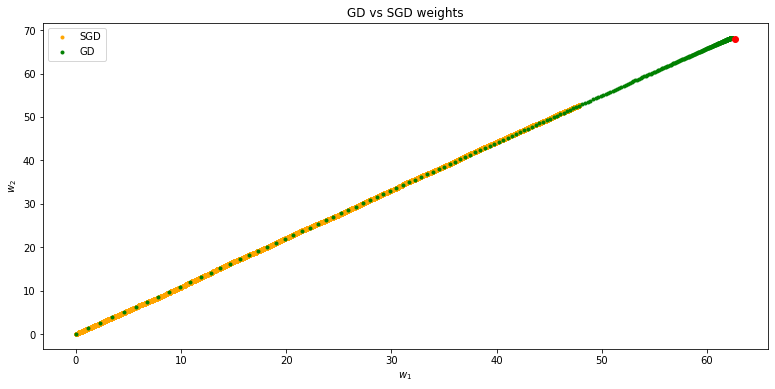

In [21]:
plt.figure(figsize=(13, 6))
plt.title('GD vs SGD weights')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_sgd[:, 0], w_sgd[:, 1], c = 'orange', marker = '.', label = 'SGD')
plt.scatter(w_gd[:, 0], w_gd[:, 1], c = 'g', marker = '.', label = 'GD')
plt.scatter(coef[0], coef[1], c = 'r')
plt.legend(loc="best")

plt.show()

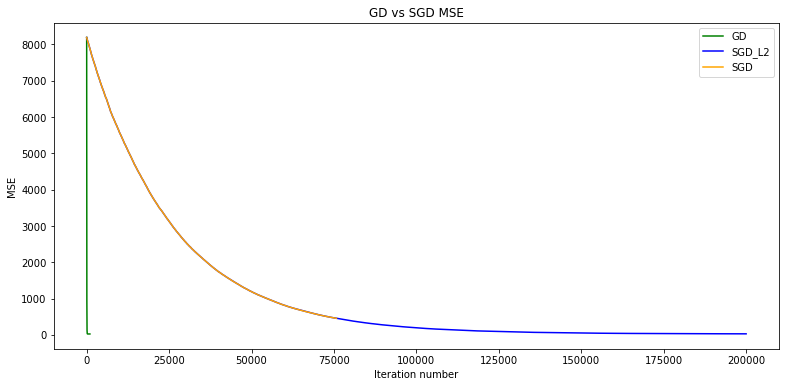

In [22]:
plt.figure(figsize=(13, 6))
plt.plot(range(len(mse_gd)), mse_gd, c = 'g', label = 'GD')
plt.plot(range(len(mse_sgd_l2)), mse_sgd_l2, c = 'blue', label = 'SGD_L2')
plt.plot(range(len(mse_sgd)), mse_sgd, c = 'orange', label = 'SGD')

plt.title('GD vs SGD MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend(loc="best")
plt.show()

In [23]:
# mse compare
err_gd, err_sgd, err_sgd_l1, err_sgd_l2

(26.425904860870876, 457.0202612517431, 457.0369641341383, 30.397063972152683)

In [24]:
iters_gd, iters_sgd, iters_sgd_l1, iters_sgd_l2

(986, 75746, 75746, 200000)

In [25]:
coef, W_gd, W_sgd, W_sgd_l1, W_sgd_l2

(array([62.6735955, 68.0472182]),
 array([62.32796201, 68.27977903]),
 array([47.87020685, 52.73031879]),
 array([47.86991479, 52.73002793]),
 array([60.93897184, 66.78696611]))

## Выводы

* GD по количеству итераций сошелся гораздо быстрее, чем SGD. Однако, проигрывает ему по времени (и ресурсам)
* среднеквадратичная ошибка алгоритма SGD без регуляризации оказалась на порядок выше, чем у GD (457 против 26)
* L1 регуляризация в данном случае не дала положительного результата
* L2 регуляризация остановилась по параметру max_iters, но среднеквадратичная ошибка при выбранном количестве итераций сравнима с ошибкой алгоритма GD. При количестве итераций 100000 (~ max_iters SGD без регуляризации) она оказалась около 197, что вдвое меньше. При увеличении итераций в 2 раза ошибка снизилась до 30 (в 6 раз)
* Дальнейшее увеличение количества итераций SGD L2 уже мало влияет на темпы снижения среднеквадратичной ошибки
* Несмотря на увеличение количества итераций, SGD с L2 регуляризацией все равно сильно выиграл у GD по времени 


In [26]:
#### проверила расчет суммы модулей и суммы квадратов вектора весов для случая отрицательных коэффициентов 

In [27]:
t = np.array([-1, 2])

In [28]:
np.linalg.norm(t, ord = 1)

3.0

In [29]:
t.T.dot(t)

5